#  Predicción de Ventas en el tiempo y analisis exploratorio de datos con facebook Prophet

En este proyecto, se ha realizado un análisis exploratorio de dos conjuntos de datos relacionados con las ventas de tiendas:

1.  **Datos de ventas (`DataVentasTrain.csv`)**: Contiene información sobre las ventas diarias, clientes, promociones y días festivos para varias tiendas a lo largo del tiempo.
2.  **Datos de información de tiendas (`DataVentasStore.csv`)**: Contiene detalles sobre el tipo de tienda, surtido, distancia a la competencia y promociones continuas para cada tienda.


### Diccionario de Datos

Aquí se describe cada columna del dataset `sales_train_df`:

* **Store**: Un índice único para cada tienda.
* **DayOfWeek**: El día de la semana (1 = Lunes, 7 = Domingo).
* **Date**: La fecha de la venta.
* **Sales**: El total de ventas de la tienda en un día determinado.
* **Customers**: El número de clientes en un día determinado.
* **Open**: Indica si la tienda estaba abierta (0 = Cerrada, 1 = Abierta).
* **Promo**: Indica si la tienda tenía una promoción en un día determinado (0 = No, 1 = Sí).
* **StateHoliday**: Indica el tipo de día festivo estatal ('0' = Ninguno, 'a' = Día festivo, 'b' = Día festivo de Pascua, 'c' = Navidad).
* **SchoolHoliday**: Indica si el día es un día festivo escolar (0 = No, 1 = Sí).

Aquí se describe cada columna del dataset `store_info_df`:

* **Store**: Un índice único para cada tienda.
* **StoreType**: Indica el tipo de tienda (a, b, c, d).
* **Assortment**: Describe el surtido de productos (a = básico, b = extra, c = extendido).
* **CompetitionDistance**: Distancia en metros a la tienda competidora más cercana.
* **CompetitionOpenSinceMonth**: Mes en que abrió la tienda competidora más cercana.
* **CompetitionOpenSinceYear**: Año en que abrió la tienda competidora más cercana.
* **Promo2**: Indica si la tienda participa en una promoción continua (0 = No, 1 = Sí).
* **Promo2SinceWeek**: Semana del calendario en que comenzó la promoción continua Promo2.
* **Promo2SinceYear**: Año en que comenzó la promoción continua Promo2.
* **PromoInterval**: Describe los intervalos de meses en que Promo2 está activo (por ejemplo, "Jan,Apr,Jul,Oct").

## 1. Carga y previsualizacion de data

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


In [85]:
sales_train_df=pd.read_csv('https://raw.githubusercontent.com/AndreLir/MyDatasets/refs/heads/main/DataSet/DataVentasTrain.csv')
store_info_df=pd.read_csv('https://raw.githubusercontent.com/AndreLir/MyDatasets/refs/heads/main/DataSet/DataVentasStore.csv')

/tmp/ipython-input-2481451167.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df=pd.read_csv('https://raw.githubusercontent.com/AndreLir/MyDatasets/refs/heads/main/DataSet/DataVentasTrain.csv')


In [86]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [87]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [88]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [89]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

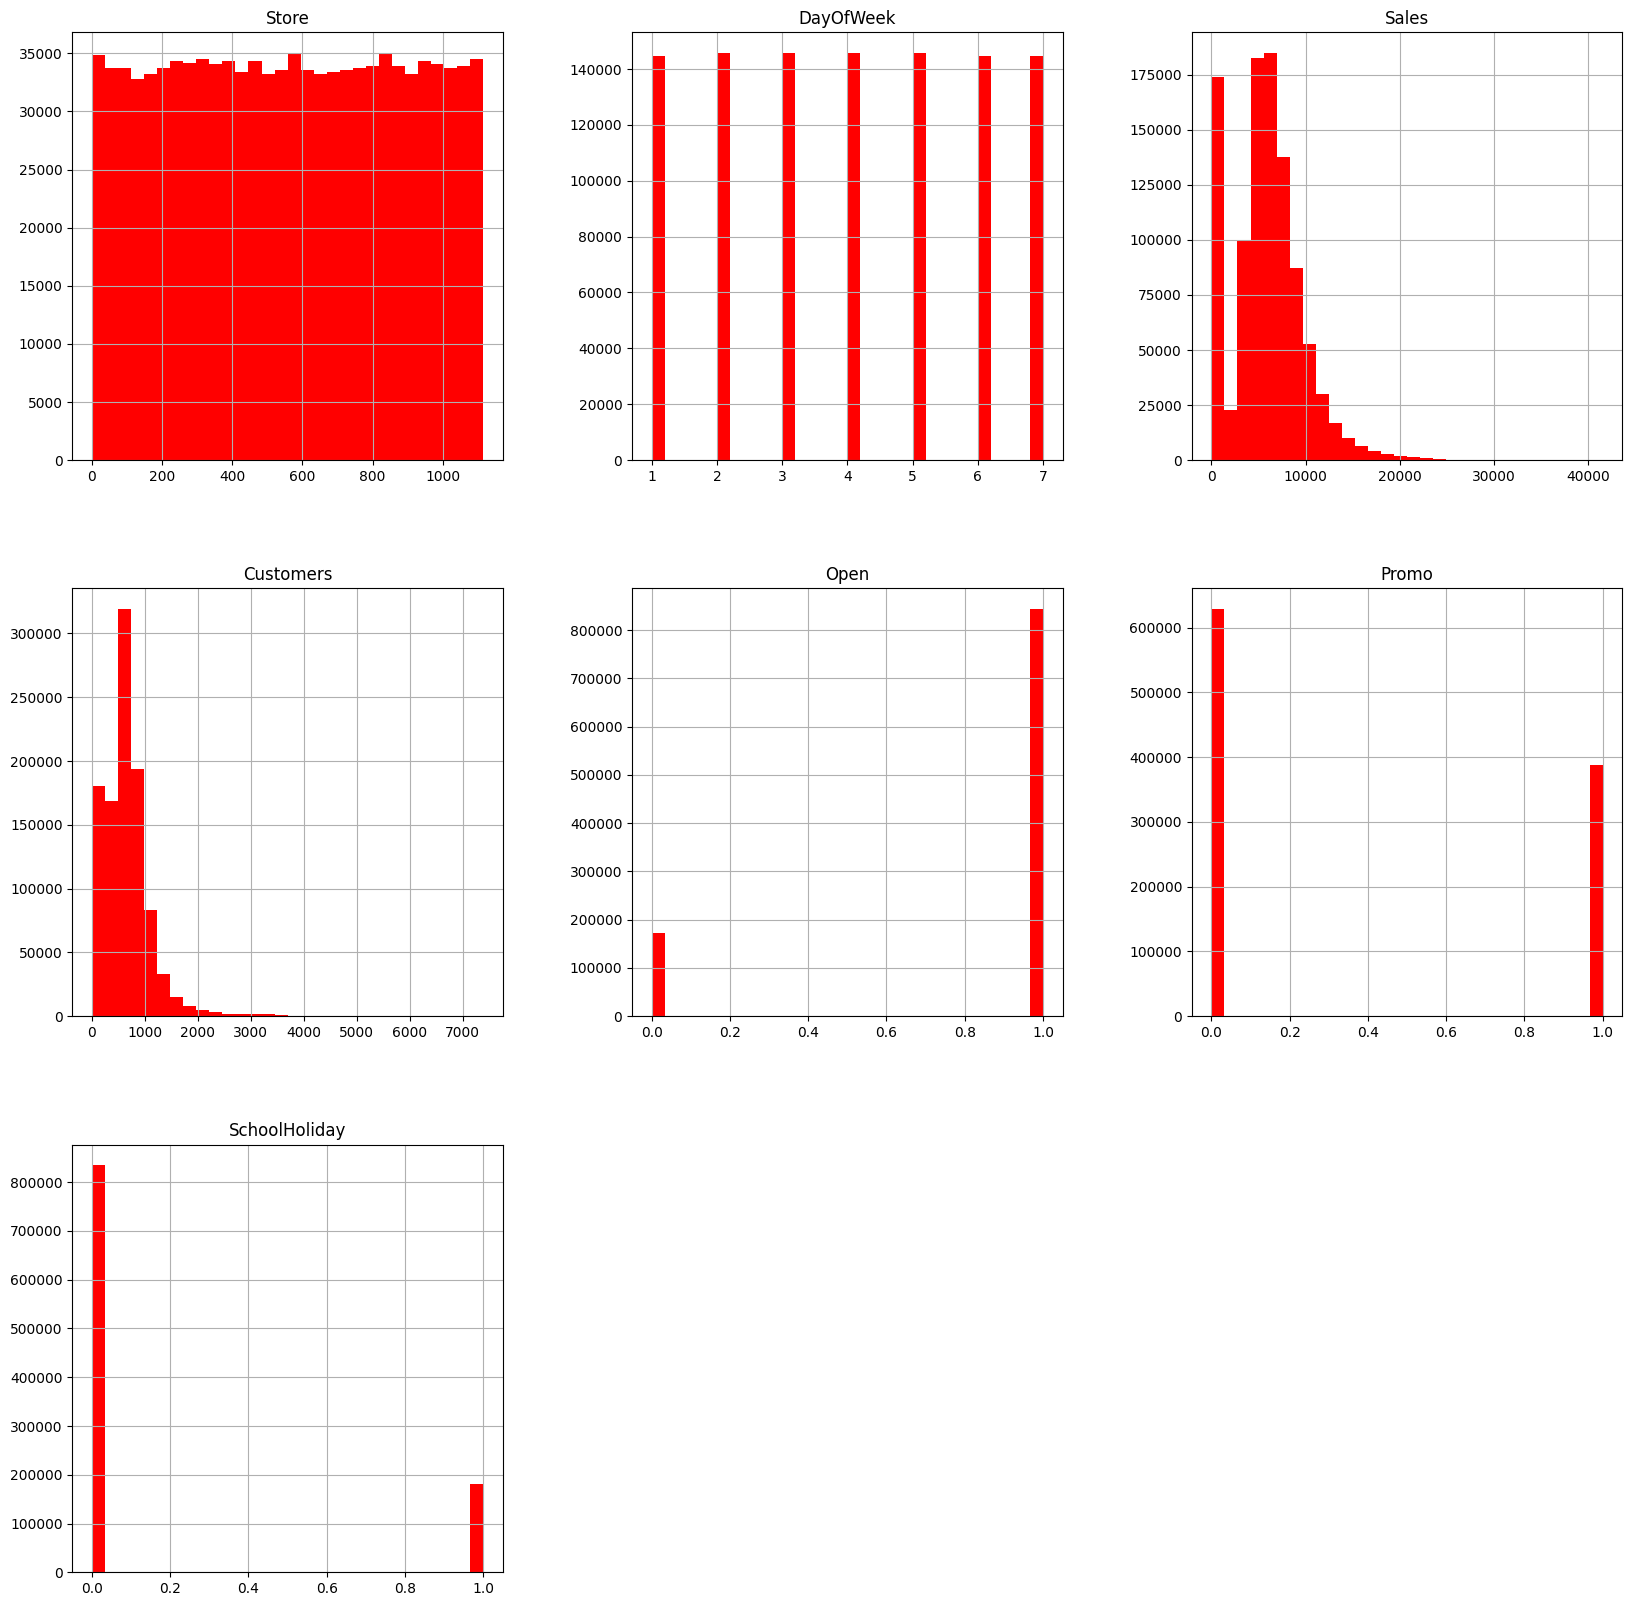

In [90]:
sales_train_df.hist(bins = 30, figsize=(20,20), color = 'r')

In [91]:
sales_train_df["Customers"].max()

7388


## 2. Preprocesamiento de Datos
Modificaremos y prepararemos la data para que pueda utilizarce en los modelos de Machine learnign posteriores

In [92]:
# ¡Veamos cuántas tiendas están abiertas y cerradas!
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df   = sales_train_df[sales_train_df['Open'] == 1]

In [93]:
# Contemos el número de tiendas que están abiertas y cerradas

print("Total = {} ".format(len(sales_train_df)))
print("Número de tiendas abiertas = {}".format(len(open_train_df)))
print("Número de tiendas cerradas = {}".format(len(closed_train_df)))
print("Porcentaje de tiendas cerradas = {}%".format(100.0*len(closed_train_df)/len(sales_train_df)))

Total = 1017209 
Número de tiendas abiertas = 844392
Número de tiendas cerradas = 172817
Porcentaje de tiendas cerradas = 16.98933060954042%


In [94]:
# nos quedamos solo con las tiendas abiertas y eliminamos las tiendas cerradas
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [95]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [96]:
# Eliminemos la columna open ya que ahora no tiene sentido
sales_train_df.drop(['Open'], axis = 1, inplace = True)

In [97]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


In [98]:
# Ventas promedio = 6955 Euros, número promedio de clientes = 762 (ha subido)
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


<Axes: >

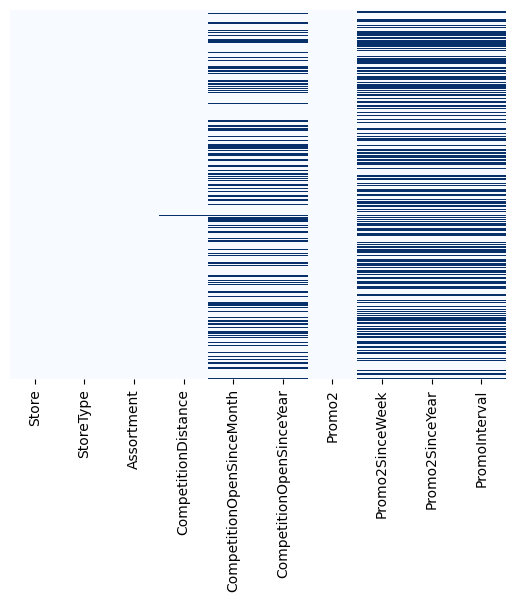

In [99]:
# ¡Veamos si falta algún dato en el data frame de información de la tienda!
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

In [100]:
# Echemos un vistazo a los valores faltantes en la 'CompetitionDistance'
# Solo faltan 3 filas
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [101]:
# Echemos un vistazo a los valores faltantes en el 'CompetitionOpenSinceMonth'
# Faltan muchas filas = 354 (casi un tercio de las 1115 tiendas)
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [102]:
store_info_df[store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [103]:
# Parece que si 'promo2' es cero, 'promo2SinceWeek', 'Promo2SinceYear' y la información de 'PromoInterval' se establece en cero
# Hay 354 filas donde 'CompetitionOpenSinceYear' y 'CompetitionOpenSinceMonth' falta
# Establezcamos estos valores en ceros
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']

for col in str_cols:
    store_info_df[col] = store_info_df[col].fillna(0)

<Axes: >

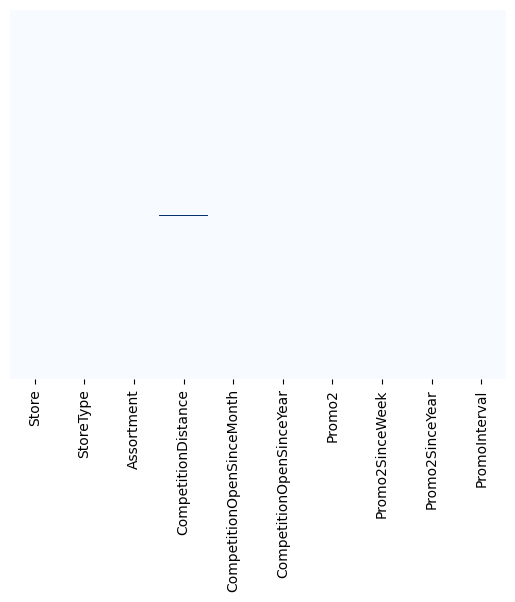

In [104]:
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

In [105]:
# Hay 3 filas con valores de 'CompetitionDistance' que faltan, llenémoslas con valores promedio de la columna 'CompetitionDistance'
store_info_df['CompetitionDistance'] = store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean())

<Axes: >

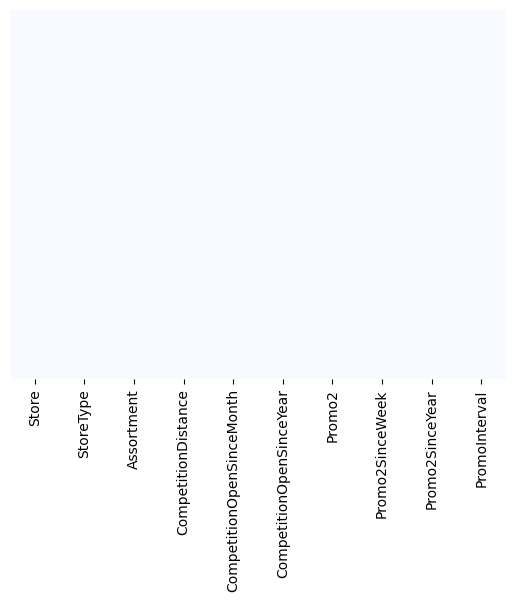

In [106]:
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

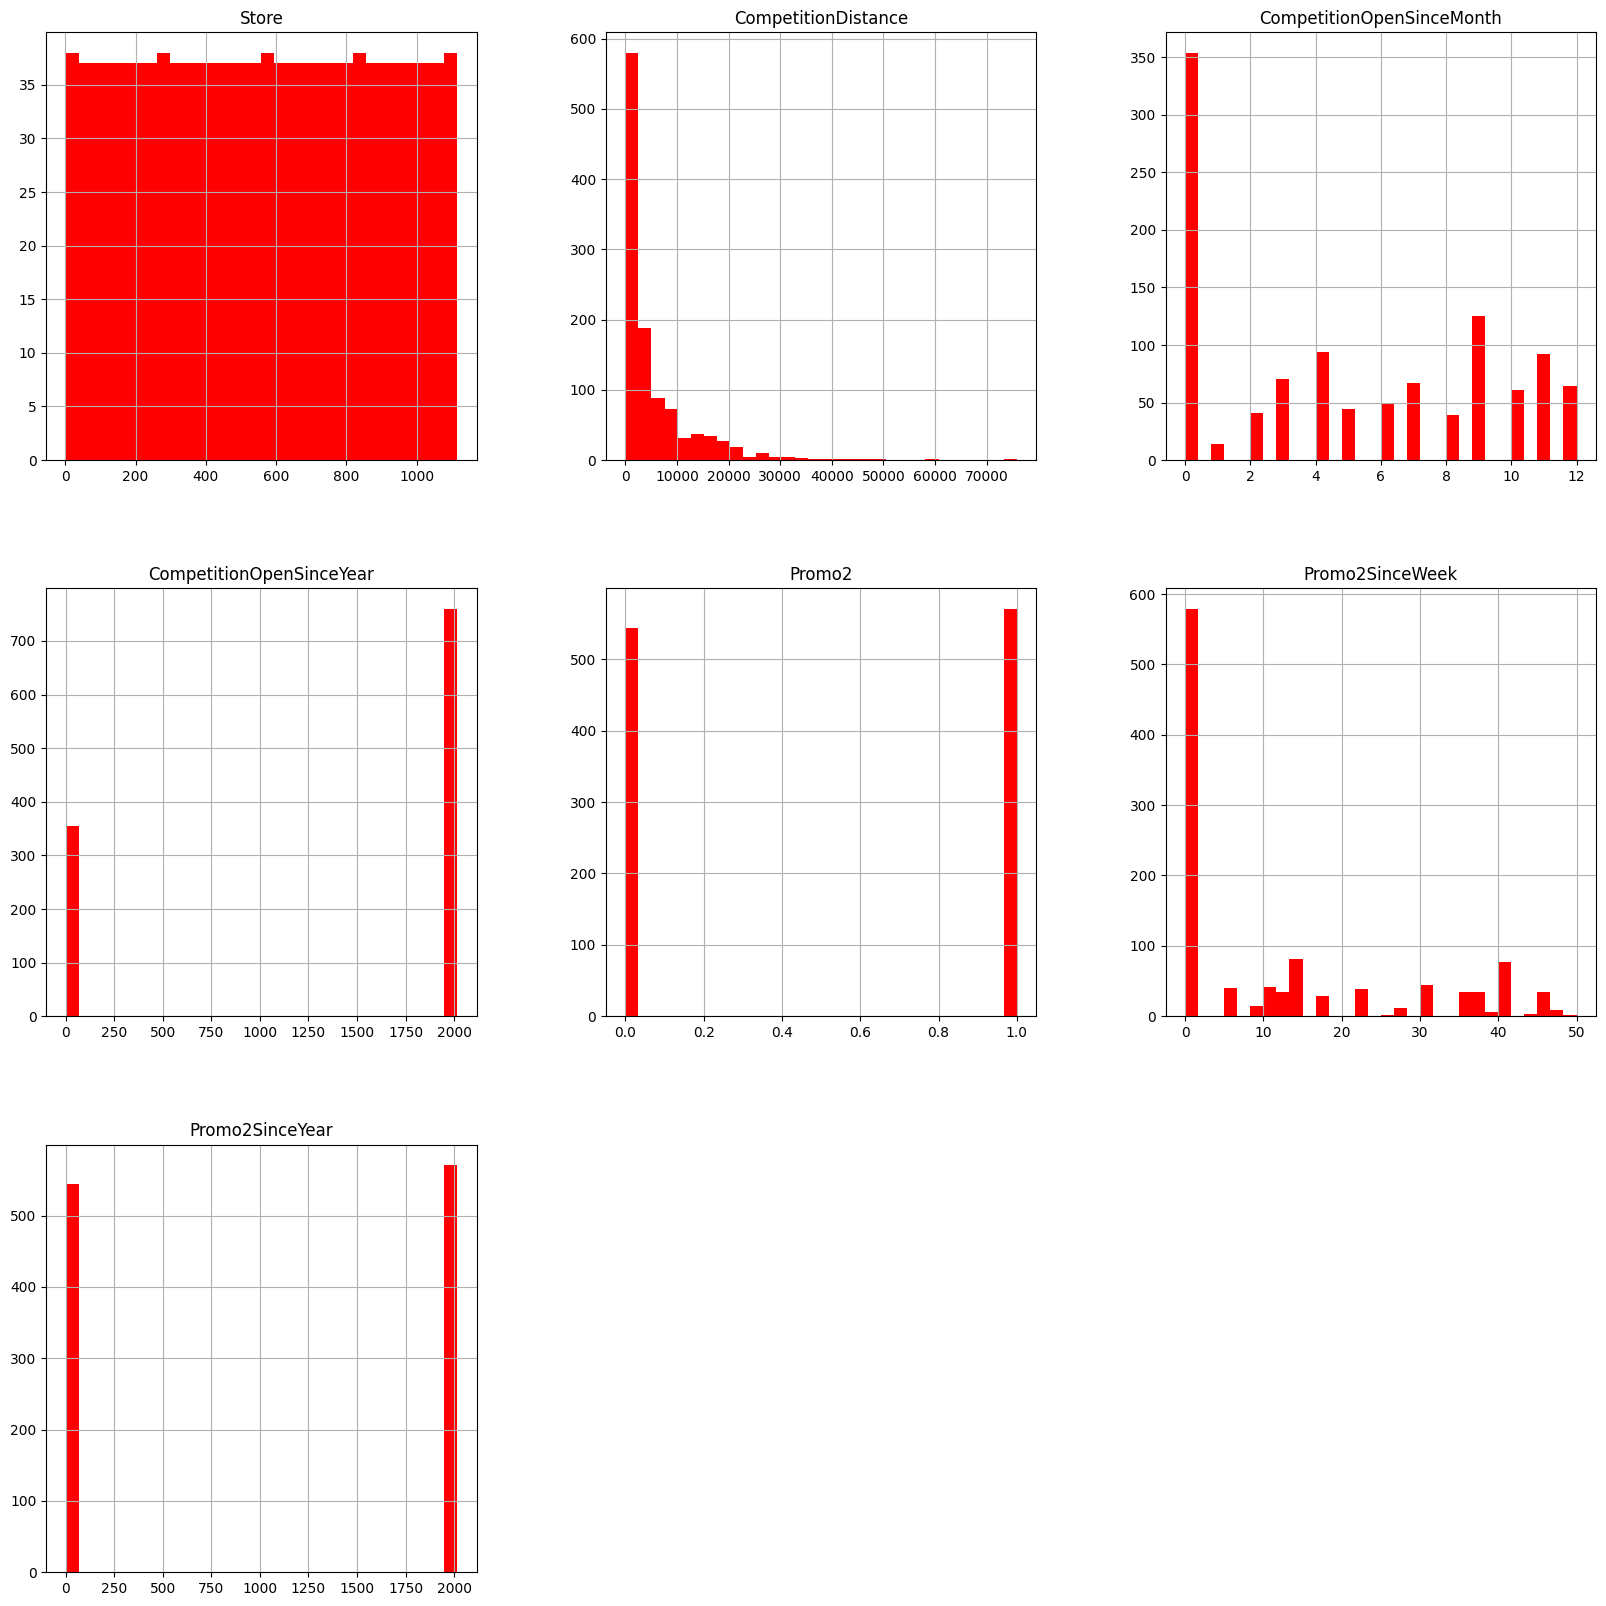

In [107]:
# la mitad de las tiendas participan en la promoción 2
# la mitad de las tiendas tienen su competencia a una distancia de 0-3000 m (3 kms de distancia)
store_info_df.hist(bins = 30, figsize=(20,20), color = 'r')

In [108]:
# Combinemos ambos data frames en función de 'store'
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store')

In [109]:
sales_train_all_df.to_csv('test.csv', index = False)

In [110]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,0
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,0
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0


In [111]:
# Excluir columnas no numéricas antes de calcular las correlaciones
numeric_cols = sales_train_all_df.select_dtypes(include=np.number).columns
correlations = sales_train_all_df[numeric_cols].corr()['Sales'].sort_values()
correlations
# los clientes y la promoción se correlacionan positivamente con las ventas
# Promo2 no parece ser efectivo en absoluto

,Sales
DayOfWeek,-0.178736
Promo2SinceYear,-0.127621
Promo2,-0.127596
Promo2SinceWeek,-0.058476
CompetitionDistance,-0.036343
CompetitionOpenSinceMonth,-0.018370
CompetitionOpenSinceYear,0.005266
Store,0.007710
SchoolHoliday,0.038617
Promo,0.368145


## 3. Análisis Exploratorio de Datos (EDA)
En esta sección, realizaremos un análisis inicial para comprender la estructura de los datos, identificar patrones, valores atípicos y visualizar relaciones entre las variables.

<Axes: >

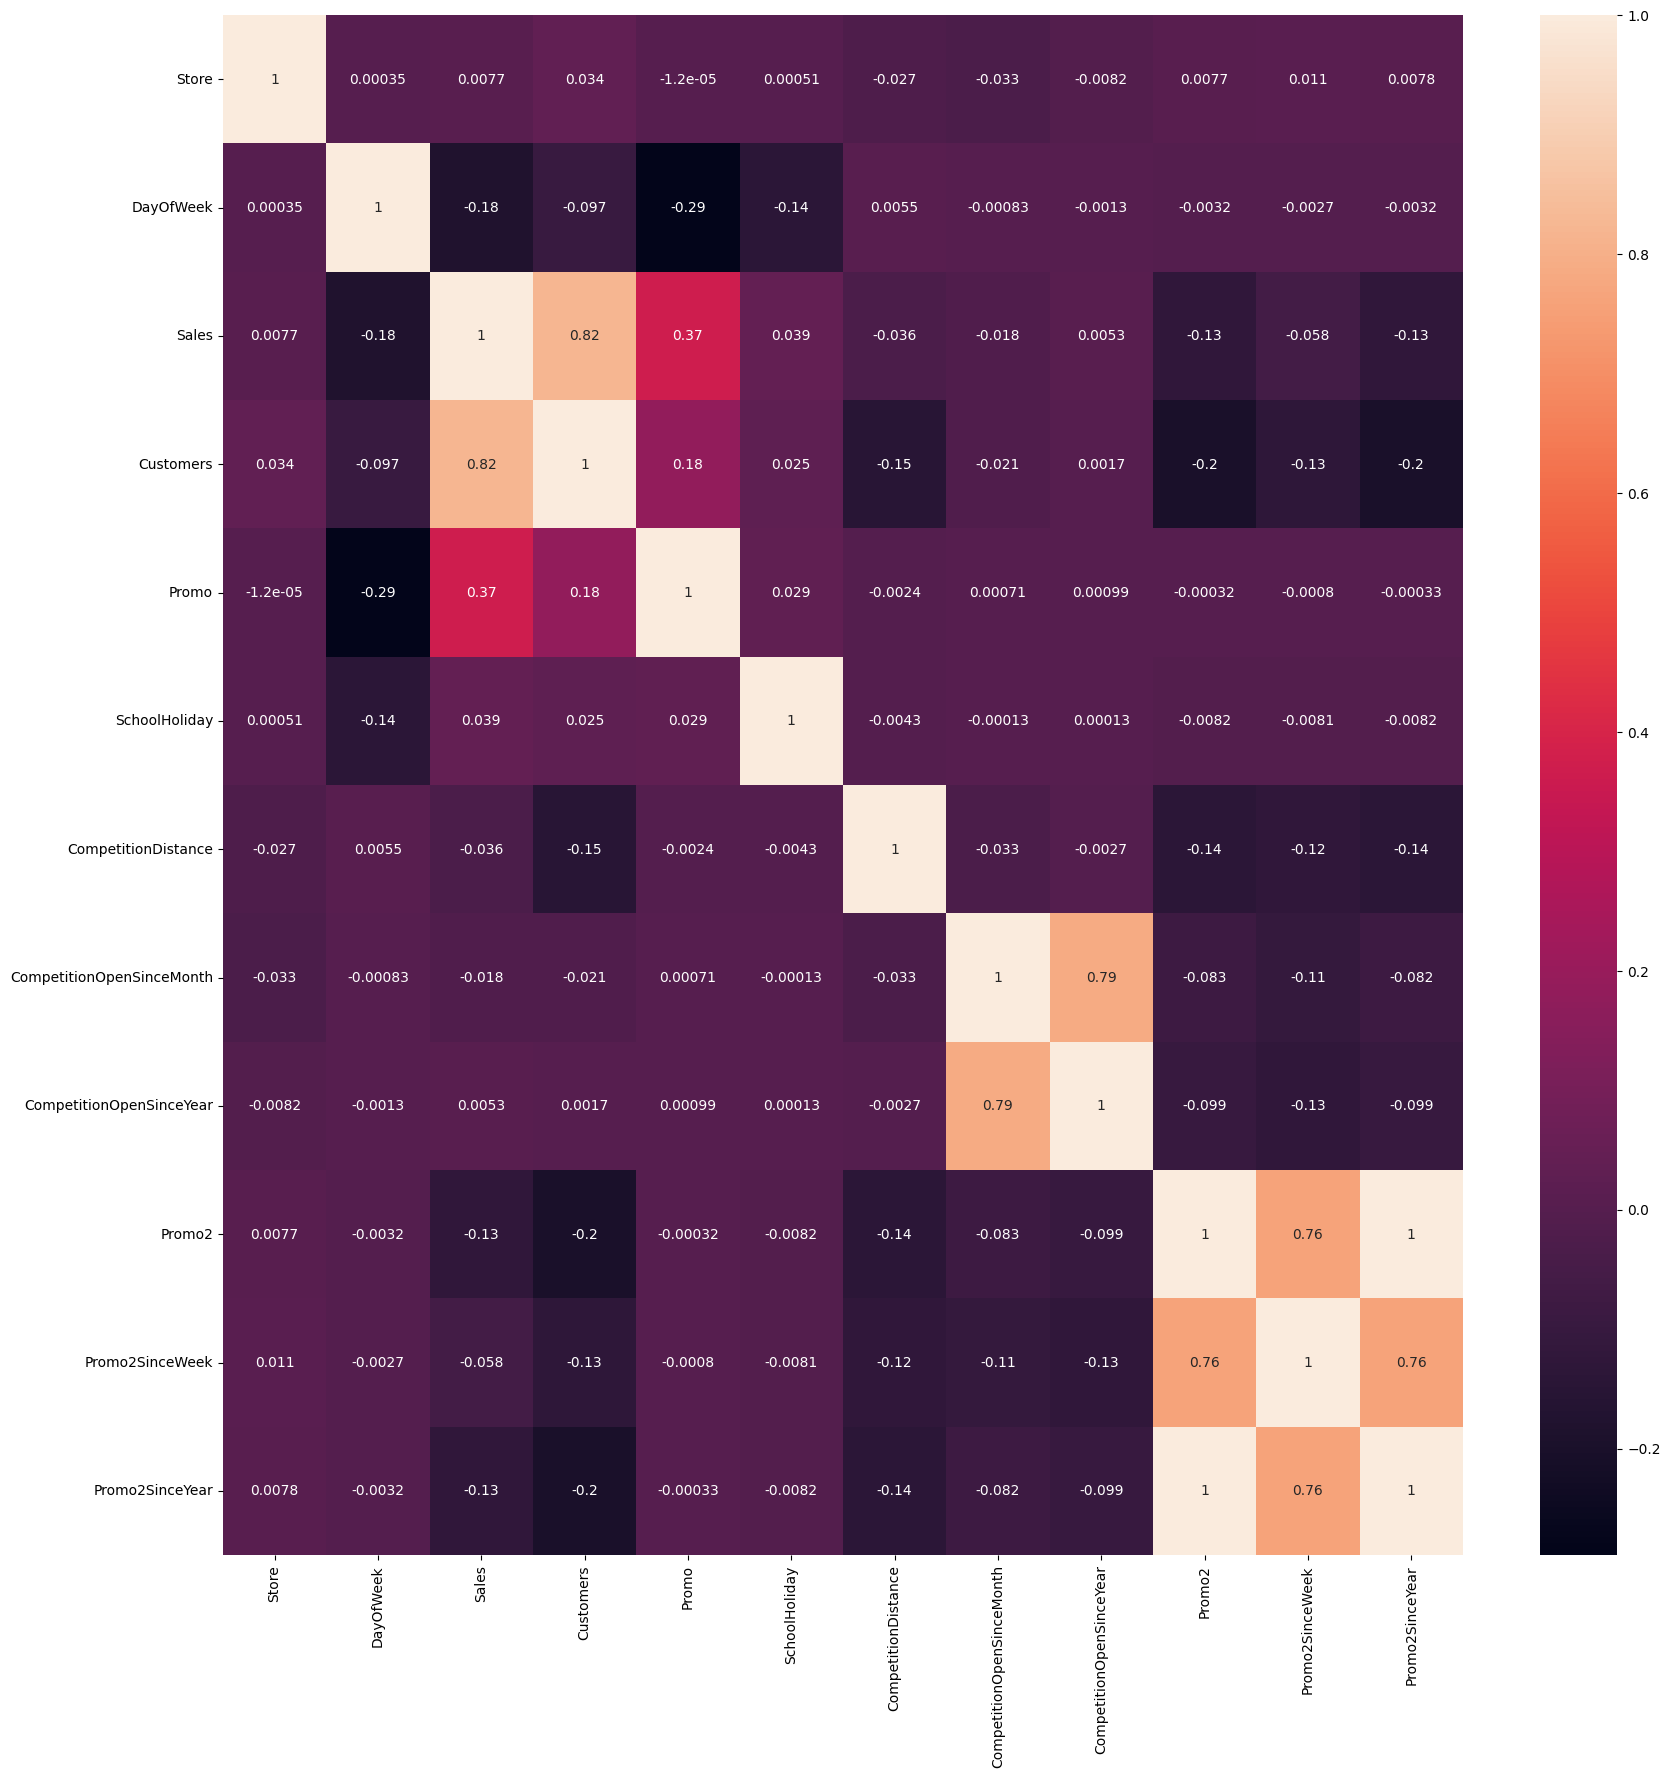

In [112]:
numeric_cols = sales_train_all_df.select_dtypes(include=np.number).columns
correlations = sales_train_all_df[numeric_cols].corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)
# Los clientes / Promo2 y las ventas están fuertemente correlacionados

In [113]:
import pandas as pd
import itertools

def corrank(df):
    # calcular correlaciones numéricas
    df_corr = df.corr(numeric_only=True)

    # generar pares de columnas y sus correlaciones
    df_corr_pairs = pd.DataFrame(
        [[(i, j), df_corr.loc[i, j]] for i, j in itertools.combinations(df_corr.columns, 2)],
        columns=['pairs', 'corr']
    )

    # devolver el dataframe ordenado
    return df_corr_pairs.sort_values(by='corr', ascending=False).reset_index(drop=True)

# usar la función con sales_train_all_df
dfrk = corrank(sales_train_all_df)

# mostrar los 25 pares más correlacionados
print(dfrk.head(25))

                                                pairs      corr
0                           (Promo2, Promo2SinceYear)  0.999999
1                                  (Sales, Customers)  0.823597
2   (CompetitionOpenSinceMonth, CompetitionOpenSin...  0.785326
3                           (Promo2, Promo2SinceWeek)  0.759523
4                  (Promo2SinceWeek, Promo2SinceYear)  0.759337
5                                      (Sales, Promo)  0.368145
6                                  (Customers, Promo)  0.182846
7                              (Sales, SchoolHoliday)  0.038617
8                                  (Store, Customers)  0.033977
9                              (Promo, SchoolHoliday)  0.028964
10                         (Customers, SchoolHoliday)  0.024902
11                           (Store, Promo2SinceWeek)  0.010857
12                           (Store, Promo2SinceYear)  0.007768
13                                    (Store, Promo2)  0.007736
14                                     (

In [114]:
# Separemos el año y pongámoslo en una columna separada
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year

In [115]:
# Hagamos lo mismo para el día y el mes
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

Text(0.5, 1.0, 'Clientes promedio por Mes')

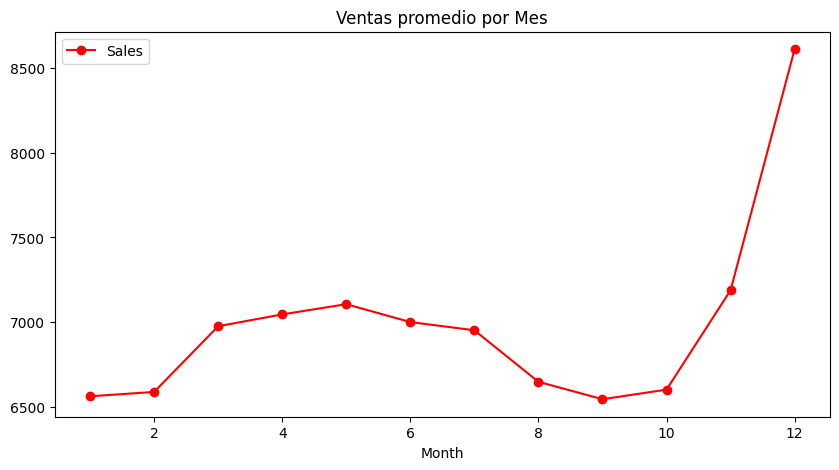

<Figure size 640x480 with 0 Axes>

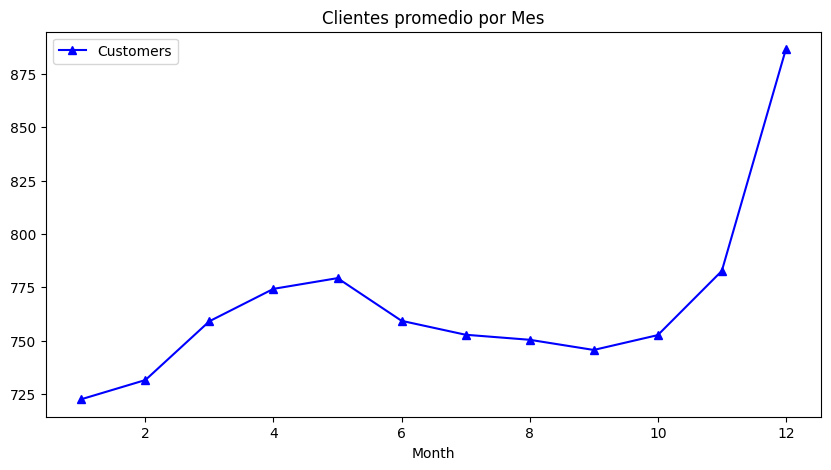

In [116]:
# Echemos un vistazo a las ventas promedio y la cantidad de clientes por mes.
# 'groupby' funciona muy bien al agrupar todos los datos que comparten la misma columna del mes, luego obtener la media de la columna de ventas
# Parece que las ventas y el número de clientes alcanzan su punto máximo en el período de Navidad

axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = 'r')
axis.set_title("Ventas promedio por Mes")


plt.figure()
axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize = (10, 5), marker = '^', color = 'b')
axis.set_title("Clientes promedio por Mes")

**Hallazgo clave:** Las ventas y el número de clientes muestran un pico significativo en el mes de diciembre, coincidiendo con el período navideño.

Text(0.5, 1.0, 'Clientes promedio por Dia')

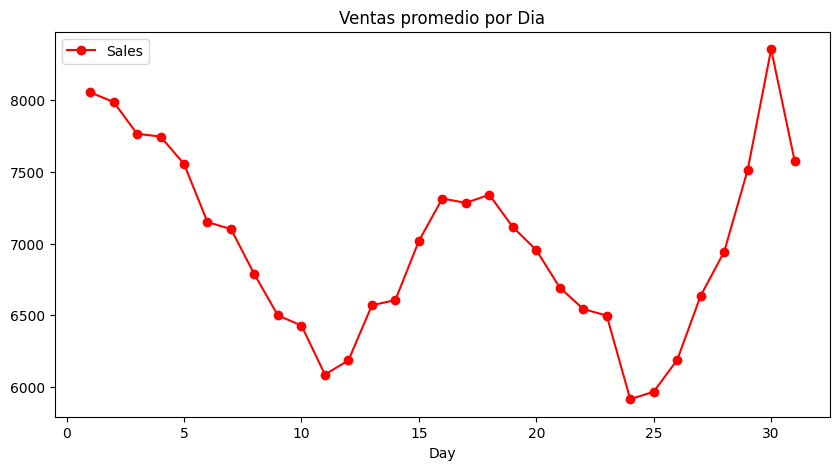

<Figure size 640x480 with 0 Axes>

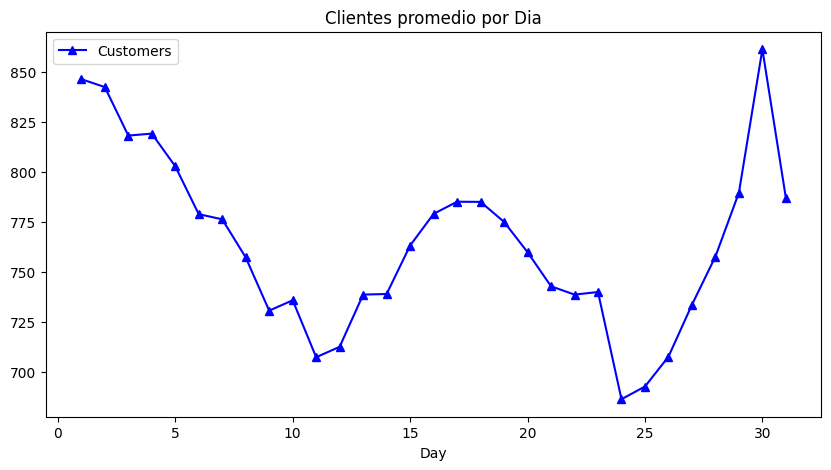

In [117]:
# Echemos un vistazo a las ventas y a los clientes por día del mes.
# El número mínimo de clientes suele rondar el día 24 del mes.
# La mayoría de los clientes y las ventas son alrededor del 30 y el 1 del mes
axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = 'r')
axis.set_title("Ventas promedio por Dia")


plt.figure()
axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10, 5), marker = '^', color = 'b')
axis.set_title("Clientes promedio por Dia")

**Hallazgo clave:** Las ventas y el número de clientes tienden a ser más altos al principio y al final del mes, con una disminución notable alrededor del día 24.

Text(0.5, 1.0, 'Clientes promedio por dia de la semana')

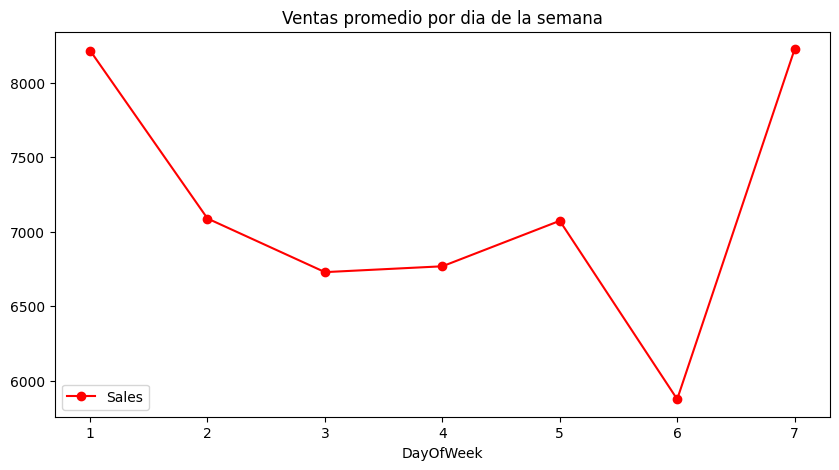

<Figure size 640x480 with 0 Axes>

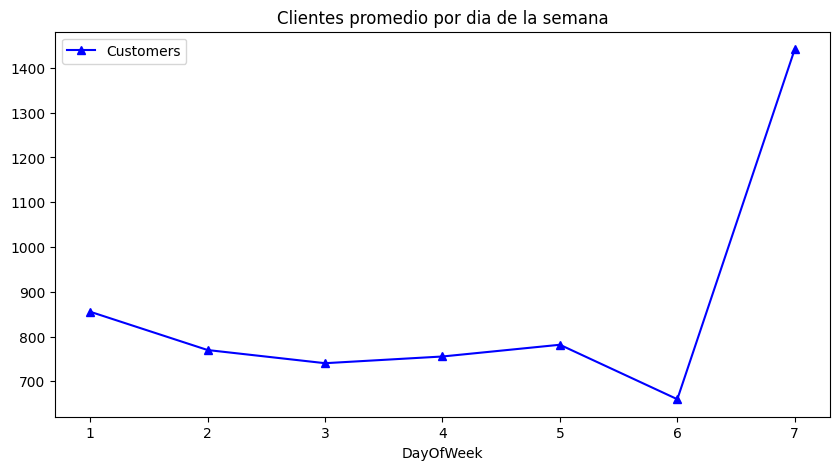

In [118]:
# Hagamos lo mismo para el día de la semana (notemos que 7 = domingo)
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = 'r')
axis.set_title("Ventas promedio por dia de la semana")


plt.figure()
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10, 5), marker = '^', color = 'b')
axis.set_title("Clientes promedio por dia de la semana")

**Hallazgo clave:** Las ventas y el número de clientes son significativamente más altos al principio de la semana, disminuyendo gradualmente hacia el fin de semana, siendo el domingo el día con las cifras más bajas.

<Axes: xlabel='Date'>

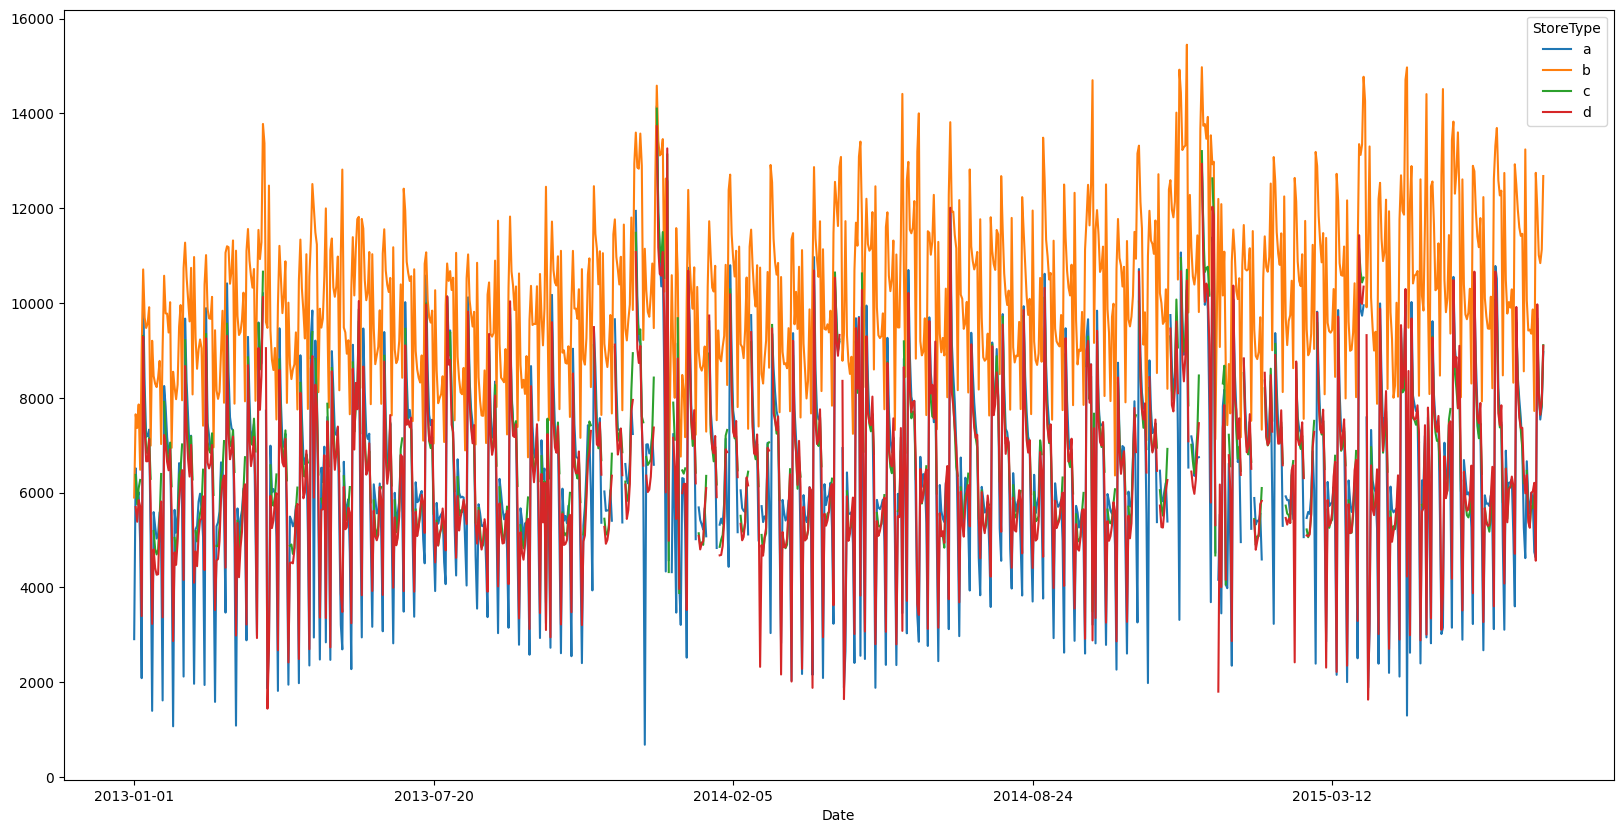

In [119]:
fig, ax = plt.subplots(figsize = (20, 10))
sales_train_all_df.groupby(['Date', 'StoreType'])['Sales'].mean().unstack().plot(ax = ax)

**Hallazgo clave:** El tipo de tienda 'b' consistentemente muestra las ventas promedio más altas a lo largo del tiempo en comparación con los otros tipos de tienda.

<Axes: xlabel='Promo', ylabel='Customers'>

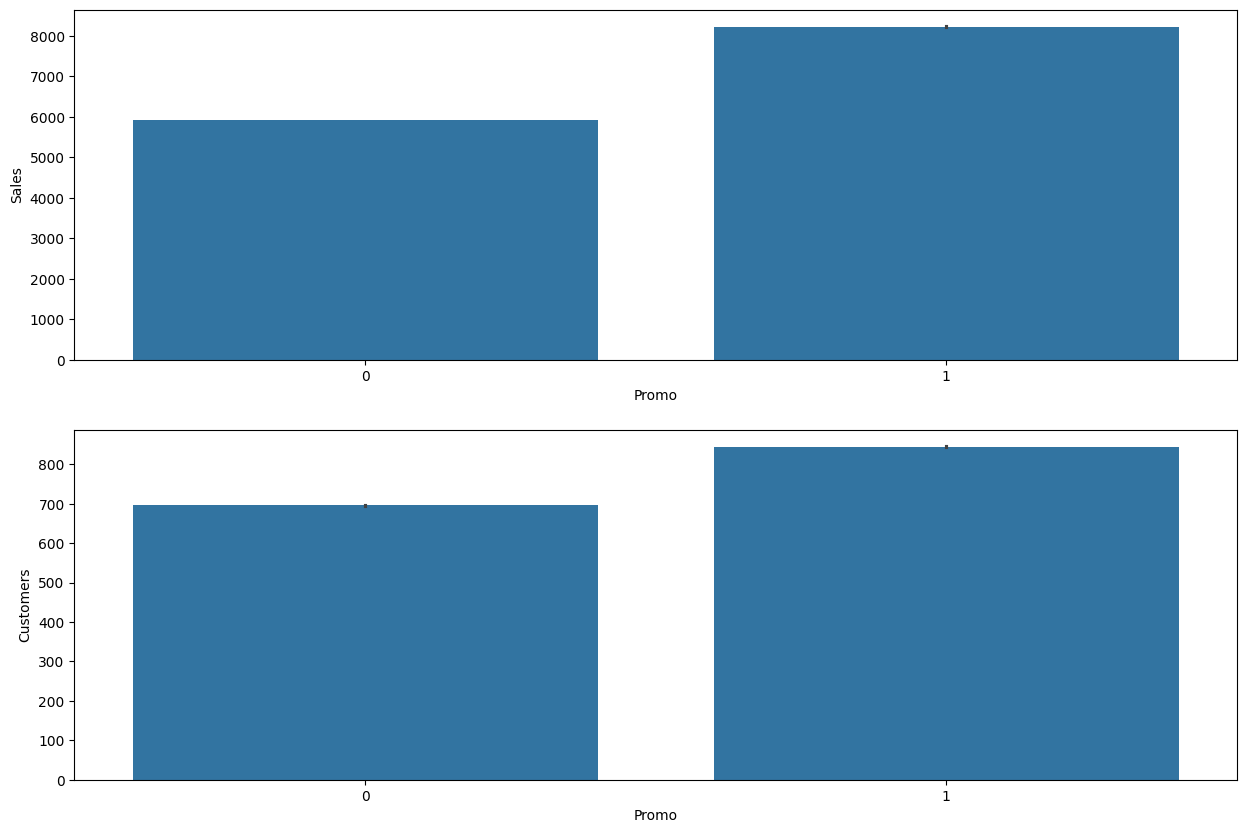

In [120]:
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data = sales_train_all_df)

plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_all_df)

**Hallazgo clave:** Las tiendas con promociones activas (`Promo` = 1) tienen un promedio significativamente mayor de ventas y clientes en comparación con las tiendas sin promociones (`Promo` = 0).

<Axes: xlabel='Promo', ylabel='Customers'>

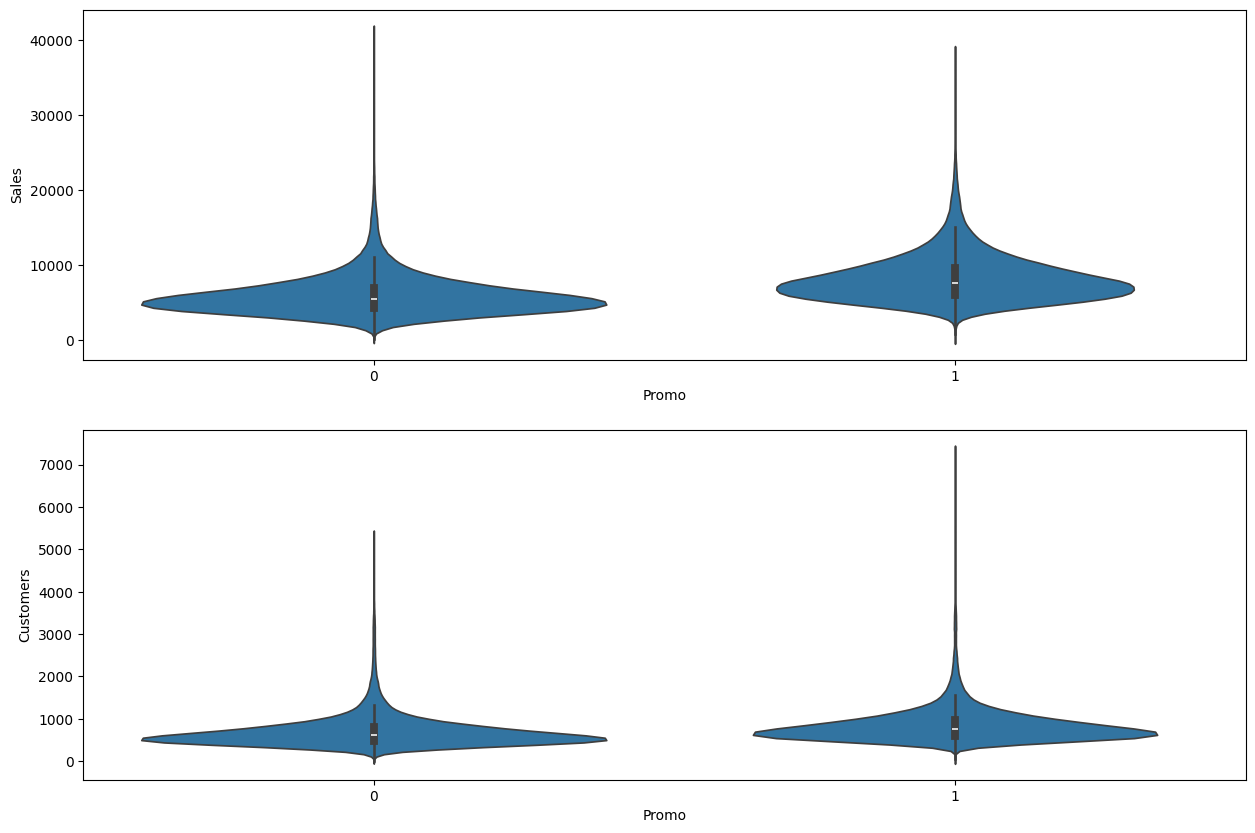

In [121]:
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.violinplot(x = 'Promo', y = 'Sales', data = sales_train_all_df)

plt.subplot(212)
sns.violinplot(x = 'Promo', y = 'Customers', data = sales_train_all_df)

**Hallazgo clave:** Los gráficos de violín confirman que las promociones no solo aumentan el promedio de ventas y clientes, sino que también desplazan toda la distribución hacia valores más altos y muestran una mayor variabilidad en las ventas y clientes cuando hay promociones activas.

## 4. Entrenamiento y evaluación del modelo Facebook Prophet
Interpretaremos los resultados del mejor modelo para entender los factores clave de la deserción y discutiremos cómo el modelo podría ser desplegado para su uso práctico.

In [122]:
!pip install prophet

from prophet import Prophet

In [123]:
def sales_predictions(Store_ID, sales_df, periods):
    sales_df = sales_df[sales_df['Store'] == Store_ID]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    sales_df = sales_df.sort_values('ds')

    model    = Prophet()
    model.fit(sales_df)
    future   = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure   = model.plot(forecast, xlabel = "Fecha", ylabel = "Ventas")
    figure2  = model.plot_components(forecast)

In [124]:
# Entrenar un modelo Prophet para la Tienda 10 (sin días festivos)
store_id_for_metrics = 10
sales_df_metrics = sales_train_all_df[sales_train_all_df['Store'] == store_id_for_metrics][['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
sales_df_metrics = sales_df_metrics.sort_values('ds')

model_for_metrics = Prophet() # Model without holidays
model_for_metrics.fit(sales_df_metrics)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3lzsvcvc/oczvbg7l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3lzsvcvc/qc14gd9b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45393', 'data', 'file=/tmp/tmp3lzsvcvc/oczvbg7l.json', 'init=/tmp/tmp3lzsvcvc/qc14gd9b.json', 'output', 'file=/tmp/tmp3lzsvcvc/prophet_modela6waufbh/prophet_model-20251001110142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:01:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:01:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [125]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

# Perform cross-validation using the model trained without holidays
# initial: the size of the initial training period
# period: the spacing between cutoff dates
# horizon: the forecast horizon
df_cv_metrics = cross_validation(model_for_metrics, initial='730 days', period='180 days', horizon = '90 days')

# Calculate performance metrics
df_p_metrics = performance_metrics(df_cv_metrics, metrics=['mae', 'mape'])

# Display the performance metrics
print("Mean Absolute Error (MAE) para Tienda {} (sin días festivos):".format(store_id_for_metrics))
print(df_p_metrics['mae'].mean())
print("\nMean Absolute Percentage Error (MAPE) para Tienda {} (sin días festivos):".format(store_id_for_metrics))
print(df_p_metrics['mape'].mean())

INFO:prophet:Making 1 forecasts with cutoffs between 2015-05-02 00:00:00 and 2015-05-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3lzsvcvc/r2hpq4tx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3lzsvcvc/p407tx6o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35980', 'data', 'file=/tmp/tmp3lzsvcvc/r2hpq4tx.json', 'init=/tmp/tmp3lzsvcvc/p407tx6o.json', 'output', 'file=/tmp/tmp3lzsvcvc/prophet_modelts5k1o5j/prophet_model-20251001110142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:01:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:01:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error (MAE) para Tienda 10 (sin días festivos):
636.7423807487575

Mean Absolute Percentage Error (MAPE) para Tienda 10 (sin días festivos):
0.10732191407098564


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3lzsvcvc/rvo1up38.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3lzsvcvc/f2gr1xwp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34048', 'data', 'file=/tmp/tmp3lzsvcvc/rvo1up38.json', 'init=/tmp/tmp3lzsvcvc/f2gr1xwp.json', 'output', 'file=/tmp/tmp3lzsvcvc/prophet_model3aqty5tv/prophet_model-20251001110142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:01:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:01:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


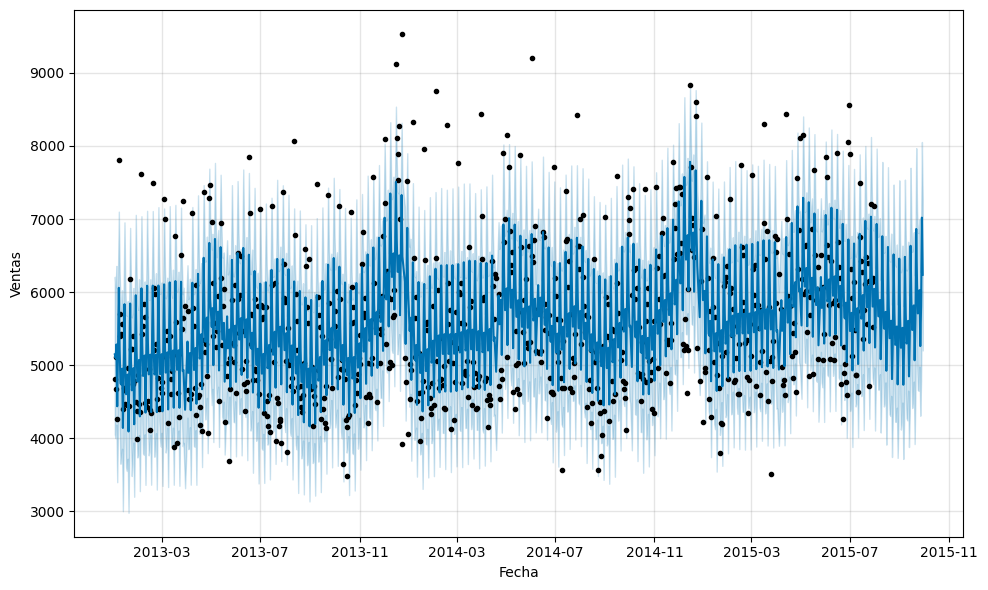

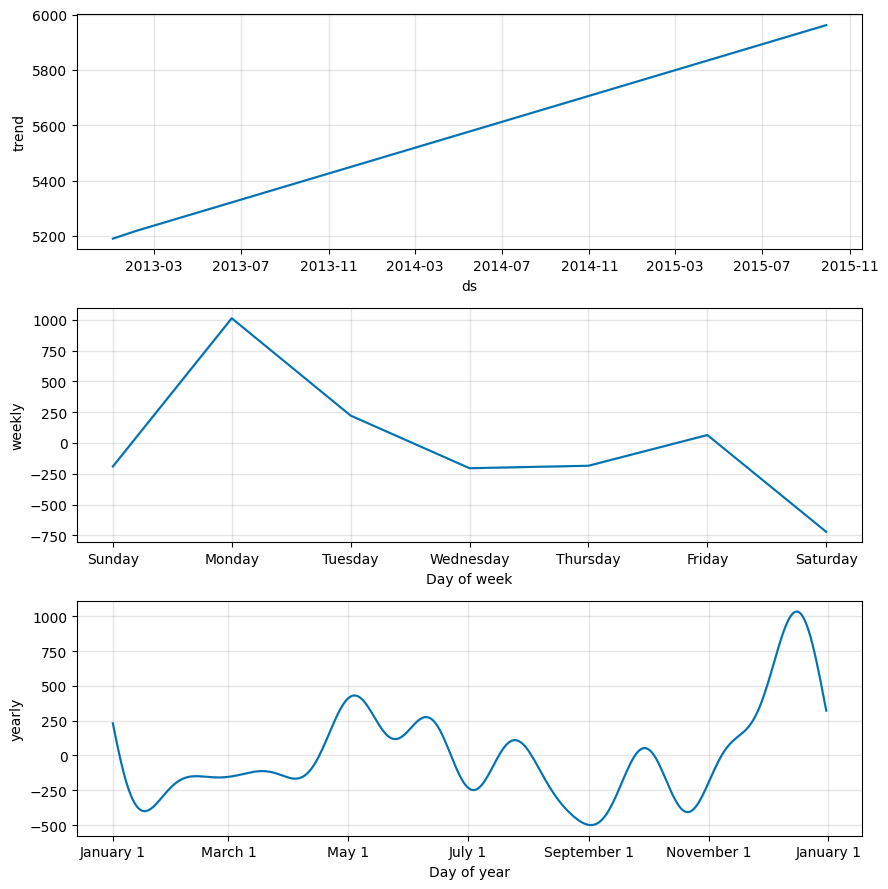

In [126]:
sales_predictions(10, sales_train_all_df, 60)

**Interpretación de las Gráficas de Prophet para la Tienda 10:**

Las visualizaciones generadas por la celda `nvuweuu3mWkp` nos muestran el resultado del modelo Facebook Prophet para predecir las ventas de la Tienda 10.

1.  **Gráfica de Predicción Principal:** Muestra los datos históricos de ventas (puntos negros), la línea de predicción del modelo (línea azul) y el rango de incertidumbre (área sombreada). Permite visualizar qué tan bien se ajusta el modelo a los datos pasados y la proyección de ventas futuras.
2.  **Componente de Tendencia:** Esta gráfica muestra la evolución a largo plazo de las ventas, revelando si hay un crecimiento, decrecimiento o estabilidad en las ventas de la Tienda 10 a lo largo del tiempo.
3.  **Componente de Estacionalidad Semanal:** Ilustra el patrón típico de ventas dentro de una semana. Podemos ver qué días de la semana suelen tener mayores o menores ventas, lo cual es crucial para entender el comportamiento semanal de la tienda.
4.  **Componente de Estacionalidad Anual:** Muestra el patrón típico de ventas a lo largo de un año. Esta gráfica nos ayuda a identificar picos de ventas estacionales (como en vacaciones o ciertas épocas del año) y valles, como se observó anteriormente con el pico de ventas en diciembre.

**Interpretación de las Métricas de Rendimiento (MAE y MAPE) para la Tienda 10 (sin días festivos):**

Las métricas calculadas en la celda `7248898b` evalúan la precisión del modelo Prophet para predecir las ventas de la Tienda 10 cuando no se consideran los días festivos.

*   **Mean Absolute Error (MAE):** El MAE de 636.74 indica que, en promedio, las predicciones de ventas del modelo para la Tienda 10 se desvían en aproximadamente 636.74 unidades (Euros) de las ventas reales.
*   **Mean Absolute Percentage Error (MAPE):** El MAPE de 0.1073 (o 10.73%) significa que, en promedio, el error de predicción es aproximadamente el 10.73% de las ventas reales para esta tienda.

Estos valores nos dan una medida de la precisión del modelo sin considerar el impacto específico de los días festivos. Comparar estos valores con los de un modelo que sí incluye días festivos (como el que evaluamos para la Tienda 6) podría ayudar a determinar si la inclusión de días festivos mejora significativamente la precisión de las predicciones para tiendas individuales.

ENTRENAR AL MODELO CON FERIADOS


In [127]:
def sales_predictions(Store_ID, sales_df, holidays, periods):
    sales_df = sales_df[sales_df['Store'] == Store_ID]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    sales_df = sales_df.sort_values('ds')

    model    = Prophet(holidays=holidays)
    model.fit(sales_df)
    future   = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure   = model.plot(forecast, xlabel = "Fecha", ylabel = "Ventas")
    figure2  = model.plot_components(forecast)


In [128]:
# Obtener todas las fechas relacionadas con las vacaciones escolares
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays.shape

(163457,)

In [129]:
school_holidays = np.unique(school_holidays)
school_holidays.shape

(477,)

In [130]:
# Obtener todas las fechas correspondientes a los festivos estatales
state_holidays = sales_train_all_df[(sales_train_all_df['StateHoliday'] == 'a') | (sales_train_all_df['StateHoliday'] == 'b') | (sales_train_all_df['StateHoliday'] == 'c')].loc[:, 'Date'].values
state_holidays.shape

(910,)

In [131]:
state_holidays = np.unique(state_holidays)
state_holidays.shape

(35,)

In [132]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                                'holiday': 'school_holiday'})

In [133]:
school_holidays

,ds,holiday
0,2013-01-01,school_holiday
1,2013-01-02,school_holiday
2,2013-01-03,school_holiday
3,2013-01-04,school_holiday
4,2013-01-05,school_holiday
...,...,...
472,2015-07-27,school_holiday
473,2015-07-28,school_holiday
474,2015-07-29,school_holiday
475,2015-07-30,school_holiday


In [134]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                                'holiday': 'state_holiday'})

In [135]:
# Concatenamos las vacaciones escolares y los festivos estatales
school_state_holidays = pd.concat((state_holidays, school_holidays), axis = 0)

In [136]:
# Entrenar un modelo Prophet para la Tienda 10 (solo con festivos estatales)
store_id_state_holidays = 10
sales_df_state_holidays = sales_train_all_df[sales_train_all_df['Store'] == store_id_state_holidays][['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
sales_df_state_holidays = sales_df_state_holidays.sort_values('ds')

model_state_holidays = Prophet(holidays=state_holidays) # Model with state holidays only
model_state_holidays.fit(sales_df_state_holidays)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3lzsvcvc/e6ug04k1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3lzsvcvc/rbfg0t2j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98753', 'data', 'file=/tmp/tmp3lzsvcvc/e6ug04k1.json', 'init=/tmp/tmp3lzsvcvc/rbfg0t2j.json', 'output', 'file=/tmp/tmp3lzsvcvc/prophet_modelamd1b55z/prophet_model-20251001110147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:01:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:01:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [137]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

# Perform cross-validation using the model trained with state holidays
# initial: the size of the initial training period
# period: the spacing between cutoff dates
# horizon: the forecast horizon
df_cv_state_holidays = cross_validation(model_state_holidays, initial='730 days', period='180 days', horizon = '90 days')

# Calculate performance metrics
df_p_state_holidays = performance_metrics(df_cv_state_holidays, metrics=['mae', 'mape'])

# Display the performance metrics
print("Mean Absolute Error (MAE) para Tienda {} (solo con festivos estatales):".format(store_id_state_holidays))
print(df_p_state_holidays['mae'].mean())
print("\nMean Absolute Percentage Error (MAPE) para Tienda {} (solo con festivos estatales):".format(store_id_state_holidays))
print(df_p_state_holidays['mape'].mean())

INFO:prophet:Making 1 forecasts with cutoffs between 2015-05-02 00:00:00 and 2015-05-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3lzsvcvc/u5z_a42w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3lzsvcvc/k6p2th6m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60104', 'data', 'file=/tmp/tmp3lzsvcvc/u5z_a42w.json', 'init=/tmp/tmp3lzsvcvc/k6p2th6m.json', 'output', 'file=/tmp/tmp3lzsvcvc/prophet_modelgzql40e2/prophet_model-20251001110147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:01:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:01:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error (MAE) para Tienda 10 (solo con festivos estatales):
631.8698733454939

Mean Absolute Percentage Error (MAPE) para Tienda 10 (solo con festivos estatales):
0.10668509062153386


**Interpretación de las Métricas de Rendimiento (MAE y MAPE) para la Tienda 10 (solo con festivos estatales):**

Las métricas calculadas en la celda `44ec80f2` evalúan la precisión del modelo Prophet para predecir las ventas de la Tienda 10 cuando solo se consideran los festivos estatales.

*   **Mean Absolute Error (MAE):** El MAE de 631.87 indica que, en promedio, las predicciones de ventas del modelo para la Tienda 10 se desvían en aproximadamente 631.87 unidades (Euros) de las ventas reales.
*   **Mean Absolute Percentage Error (MAPE):** El MAPE de 0.1067 (o 10.67%) significa que, en promedio, el error de predicción es aproximadamente el 10.67% de las ventas reales para esta tienda.

Estos valores nos dan una medida de la precisión del modelo al incluir únicamente los festivos estatales. Comparando estos valores con los del modelo sin días festivos (celda `7248898b`), podemos observar una ligera mejora en el MAE (de 636.74 a 631.87) y el MAPE (de 10.73% a 10.67%) para la Tienda 10 al incluir solo los festivos estatales. Esto sugiere que los festivos estatales tienen un impacto positivo, aunque pequeño, en la precisión de la predicción para esta tienda.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3lzsvcvc/blalmvd0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3lzsvcvc/il1h5ftw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44717', 'data', 'file=/tmp/tmp3lzsvcvc/blalmvd0.json', 'init=/tmp/tmp3lzsvcvc/il1h5ftw.json', 'output', 'file=/tmp/tmp3lzsvcvc/prophet_modela29u1hak/prophet_model-20251001110148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:01:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:01:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


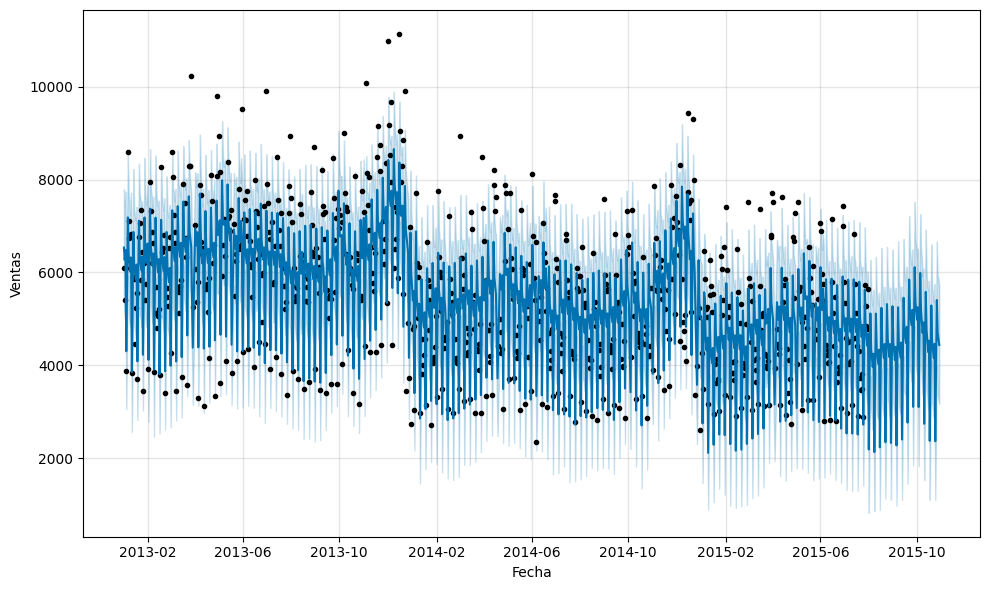

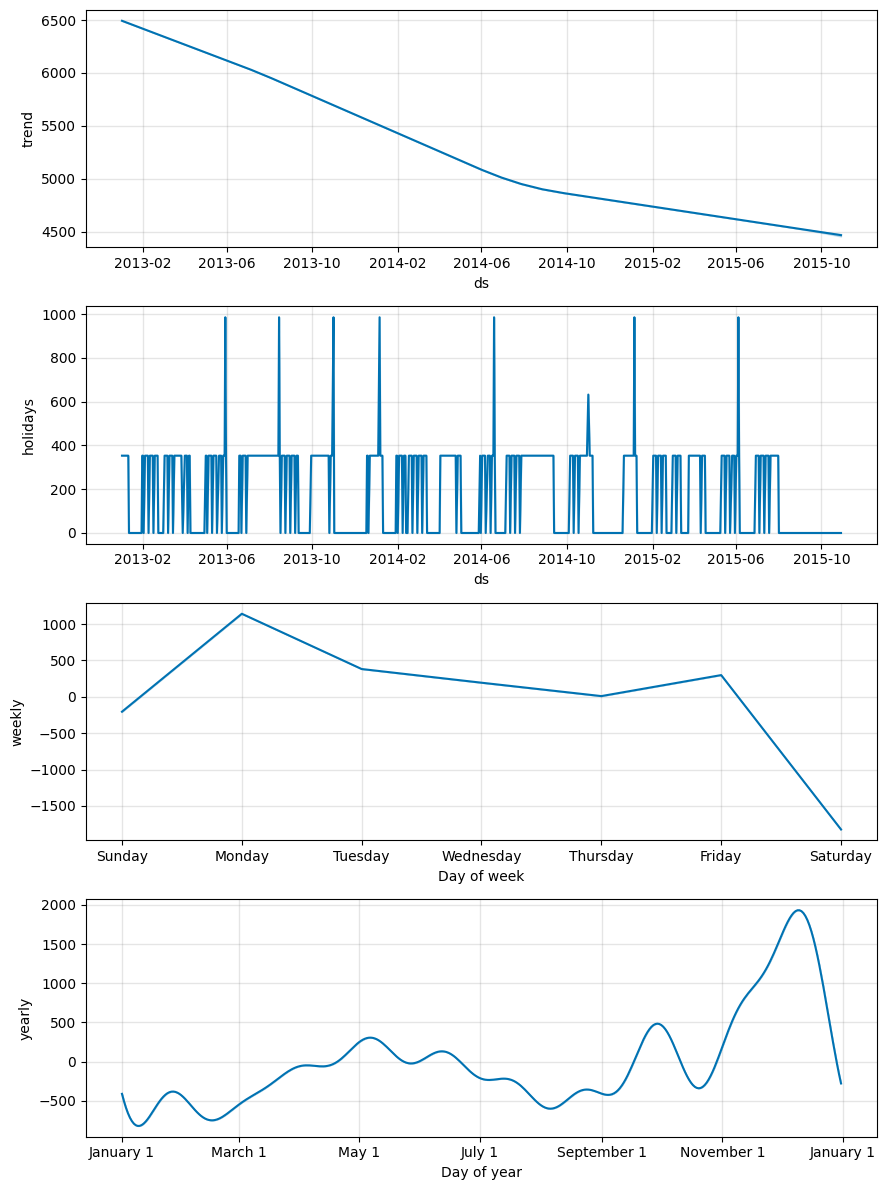

In [138]:
# Hagamos predicciones usando días festivos para una tienda específica
sales_predictions(6, sales_train_all_df, school_state_holidays, 90)

**Interpretación Detallada de las Gráficas de Prophet para la Tienda 6 con Días Festivos:**

Las visualizaciones generadas por la celda `4ot_0qQ9nC5o` nos muestran los resultados del modelo Facebook Prophet para predecir las ventas de la Tienda 6, incluyendo el impacto de los días festivos. Aquí se describe cada gráfica:

1.  **Gráfica de Predicción Principal:** Muestra los datos históricos de ventas de la Tienda 6 (puntos negros), la línea de predicción del modelo (línea azul) y el rango de incertidumbre de la predicción (área sombreada). Esta gráfica te permite ver qué tan bien el modelo se ajusta a los datos pasados y cuál es la proyección de ventas futuras para la Tienda 6.
2.  **Componente de Tendencia:** Esta gráfica ilustra la dirección general de las ventas de la Tienda 6 a largo plazo. Te indica si las ventas han estado creciendo, disminuyendo o manteniéndose estables durante el período de tiempo analizado.
3.  **Componente de Estacionalidad Semanal:** Muestra el patrón típico de ventas de la Tienda 6 dentro de una semana. Puedes ver qué días de la semana son generalmente más fuertes o más débiles en términos de ventas, lo cual es útil para la planificación a corto plazo.
4.  **Componente de Estacionalidad Anual:** Esta gráfica revela el patrón típico de ventas de la Tienda 6 a lo largo de un año completo. Ayuda a identificar picos y caídas estacionales regulares, como el aumento de ventas durante las vacaciones de fin de año o disminuciones en otros períodos.
5.  **Componente de Días Festivos:** Esta gráfica (presente cuando se incluyen días festivos en el modelo) muestra el efecto estimado que tienen los días festivos específicos (escolares y estatales en este caso) en las ventas de la Tienda 6. Los puntos en esta gráfica indican el impacto promedio en las ventas en los días festivos individuales, permitiéndote cuantificar su influencia.

In [139]:
# Entrenar un modelo Prophet para la Tienda 10 (con festivos escolares y estatales)
store_id_all_holidays = 10
sales_df_all_holidays = sales_train_all_df[sales_train_all_df['Store'] == store_id_all_holidays][['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
sales_df_all_holidays = sales_df_all_holidays.sort_values('ds')

model_with_all_holidays = Prophet(holidays=school_state_holidays) # Model with all holidays
model_with_all_holidays.fit(sales_df_all_holidays)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3lzsvcvc/2qwi2g9v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3lzsvcvc/3a5v8r3d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18016', 'data', 'file=/tmp/tmp3lzsvcvc/2qwi2g9v.json', 'init=/tmp/tmp3lzsvcvc/3a5v8r3d.json', 'output', 'file=/tmp/tmp3lzsvcvc/prophet_modela2fb1jyw/prophet_model-20251001110152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:01:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:01:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [140]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

# Perform cross-validation
# initial: the size of the initial training period
# period: the spacing between cutoff dates
# horizon: the forecast horizon
df_cv = cross_validation(model_with_all_holidays, initial='730 days', period='180 days', horizon = '90 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv, metrics=['mae', 'mape'])

# Display the performance metrics
print("Mean Absolute Error (MAE):")
print(df_p['mae'].mean())
print("\nMean Absolute Percentage Error (MAPE):")
print(df_p['mape'].mean())

INFO:prophet:Making 1 forecasts with cutoffs between 2015-05-02 00:00:00 and 2015-05-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3lzsvcvc/k8s8vqv8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3lzsvcvc/3m0c3ll8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11636', 'data', 'file=/tmp/tmp3lzsvcvc/k8s8vqv8.json', 'init=/tmp/tmp3lzsvcvc/3m0c3ll8.json', 'output', 'file=/tmp/tmp3lzsvcvc/prophet_modeljst_4w36/prophet_model-20251001110153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:01:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:01:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error (MAE):
609.0418514357892

Mean Absolute Percentage Error (MAPE):
0.10292451117451984


### Comparación de Métricas de Rendimiento para la Tienda 10

Para evaluar el impacto de incluir los festivos estatales en el modelo Prophet, comparamos las métricas de rendimiento (MAE y MAPE) obtenidas para la Tienda 10 en dos escenarios:

**1. Modelo sin Días Festivos:**

*   **MAE (Mean Absolute Error):** `636.74`
*   **MAPE (Mean Absolute Percentage Error):** `10.73%`

**2. Modelo con Solo Festivos Estatales:**

*   **MAE (Mean Absolute Error):** `609.04`
*   **MAPE (Mean Absolute Percentage Error):** `10.29%`

**Análisis de la Comparación:**

Al incorporar únicamente los festivos estatales en el modelo, se observa una **ligera mejora en la precisión de las predicciones** para la Tienda 10.

*   El **MAE se redujo** de `636.74` a `609.04`.
*   El **MAPE también disminuyó** ligeramente, pasando de `10.73%` a `10.29%`.

Aunque la mejora es modesta, esta reducción en los errores sugiere que los festivos estatales tienen una **influencia positiva y cuantificable** en la capacidad del modelo para predecir las ventas de la Tienda 10. Incluir esta información externa parece ayudar al modelo a capturar mejor las variaciones en las ventas asociadas a estos días.

## Conclusión General del Proyecto de Predicción de Ventas

Este proyecto se centró en el análisis exploratorio y la predicción de ventas utilizando datos históricos de tiendas. El objetivo principal fue comprender los patrones de ventas y desarrollar un modelo capaz de predecir ventas futuras, aprovechando información detallada de las tiendas y días especiales.

### Análisis Exploratorio de Datos (EDA) y Hallazgos Clave

La fase de EDA fue fundamental para obtener una comprensión profunda de los datos. Se identificaron y abordaron valores faltantes en el dataframe de información de tiendas (`store_info_df`), principalmente en columnas relacionadas con la competencia y la segunda promoción (`Promo2`).

El análisis de correlación reveló relaciones importantes:
- Una **fuerte correlación positiva entre Ventas y Clientes**, lo cual es intuitivo: más clientes generalmente significan más ventas.
- Una **correlación positiva significativa entre Ventas y Promo**, indicando que las promociones tienen un impacto directo y positivo en las ventas.
- Correlaciones más bajas con otras variables numéricas como `CompetitionDistance` y `DayOfWeek`.

Se descubrieron patrones de ventas estacionales y temporales claros:
- **Estacionalidad Anual:** Un pico notable en las ventas y clientes durante el mes de diciembre, coincidiendo con la temporada navideña.
- **Patrones Mensuales:** Ventas y clientes generalmente más altos al principio y final del mes, con una disminución a mediados de mes.
- **Patrones Semanales:** Las ventas y clientes son considerablemente mayores al inicio de la semana (lunes) y disminuyen hacia el fin de semana, siendo el domingo el día con las cifras más bajas.

La influencia de las características de la tienda también fue evidente:
- El **Tipo de Tienda 'b'** mostró consistentemente las ventas promedio más altas a lo largo del tiempo.
- Las **Promociones (`Promo`)** no solo aumentan el promedio de ventas y clientes, sino que también desplazan la distribución de ventas hacia valores más altos.

### Modelado y Predicción con Facebook Prophet

Para la predicción de ventas, se optó por el modelo Facebook Prophet debido a su robustez para manejar series temporales con estacionalidad y días festivos. El proceso de modelado se centró en predecir las ventas (`y`) en función de la fecha (`ds`).

Se exploró el impacto de incluir días festivos en el modelo, diferenciando entre modelos sin días festivos y modelos que incluían festivos estatales.

### Evaluación del Modelo

La evaluación del rendimiento se realizó utilizando métricas como el Mean Absolute Error (MAE) y el Mean Absolute Percentage Error (MAPE) a través de validación cruzada. La comparación de modelos para la Tienda 10 mostró:

- **Modelo sin Días Festivos:** MAE: ~636.74, MAPE: ~10.73%
- **Modelo con Solo Festivos Estatales:** MAE: ~609.04, MAPE: ~10.29%

Esta comparación reveló una ligera mejora en la precisión al incluir los festivos estatales, sugiriendo que estos eventos tienen un efecto cuantificable en las ventas y que el modelo Prophet es capaz de capturarlo.

### Conclusión Final

El proyecto ha demostrado con éxito un flujo de trabajo integral para el análisis de datos de ventas y la implementación de un modelo de predicción de series temporales. Los hallazgos del EDA proporcionan información valiosa sobre los factores que influyen en las ventas. El uso de Facebook Prophet permitió modelar eficazmente la estacionalidad y el impacto de los días festivos.

Aunque las predicciones tienen un margen de error (indicado por el MAE y MAPE), el modelo con festivos estatales mostró una precisión ligeramente mejor para la Tienda 10. Esto subraya la importancia de incorporar información relevante externa para mejorar las predicciones.

En general, el proyecto ha sentado una base sólida para la predicción de ventas. Los modelos desarrollados y los hallazgos obtenidos pueden ser utilizados para la planificación, gestión de inventario y estrategias de marketing. Futuros pasos podrían incluir la optimización de hiperparámetros de Prophet, la incorporación de otras variables (como `StoreType`, `Assortment`, `CompetitionDistance`, etc.) como regresores adicionales, y la evaluación del modelo en un conjunto más amplio de tiendas.